<h2 align=center> Principal Component Analysis</h2>

### Task 2: Load the Data and Libraries
---

In [2]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [4]:
# Data Preprocessing
# 1. Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [5]:
df.head() # first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.sample(5) # random 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
61,5.9,3.0,4.2,1.5,1
136,6.3,3.4,5.6,2.4,2
64,5.6,2.9,3.6,1.3,1
35,5.0,3.2,1.2,0.2,0
33,5.5,4.2,1.4,0.2,0


### Task 4: Standardize the Data
---

In [14]:
# 2. Scaling the data (important for PCA)
features = df.drop(columns='target')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [12]:
### Task 3: Visualize the Data


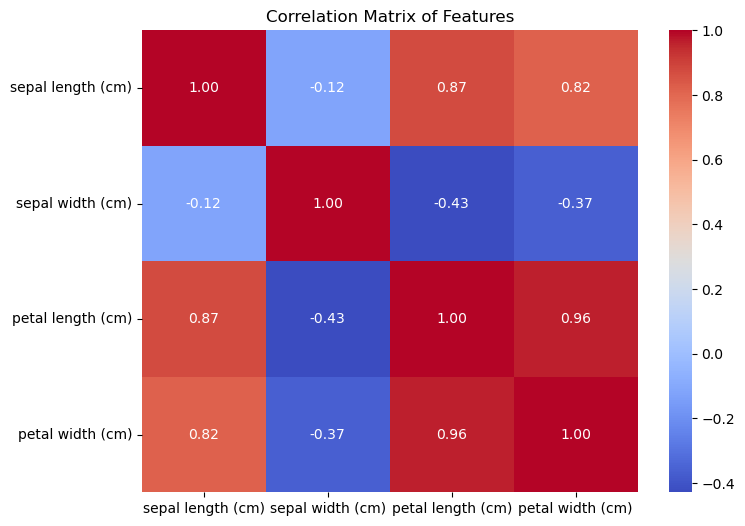

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(scaled_features, columns=features.columns).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

### Task 5: Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [16]:
# Step 1: Covariance Matrix Calculation
cov_matrix = np.cov(scaled_features.T)  # Covariance matrix of scaled features
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [17]:
# Step 2: Eigenvalues and Eigenvectors Calculation
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)


Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [18]:
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("\nExplained Variance Ratio:\n", explained_variance_ratio)

# Step 4: Sorting Eigenvalues and Eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sorting eigenvalues in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("\nSorted Eigenvalues:\n", sorted_eigenvalues)
print("\nSorted Eigenvectors:\n", sorted_eigenvectors)


Explained Variance Ratio:
 [0.72962445 0.22850762 0.03668922 0.00517871]

Sorted Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Sorted Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

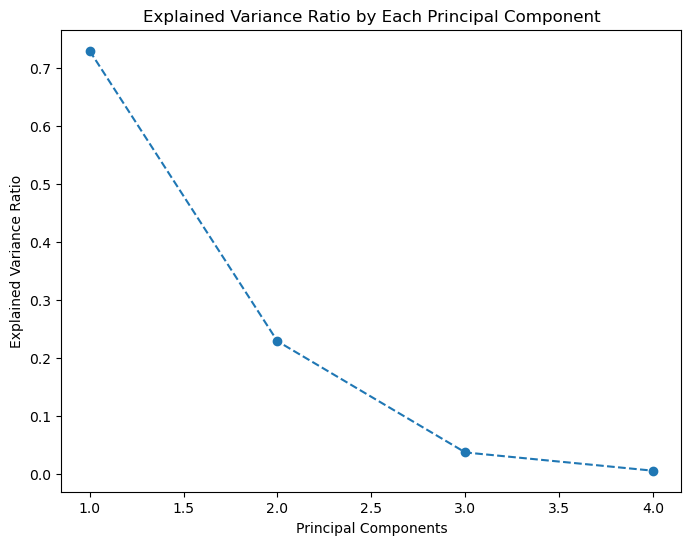

In [20]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(sorted_eigenvalues) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


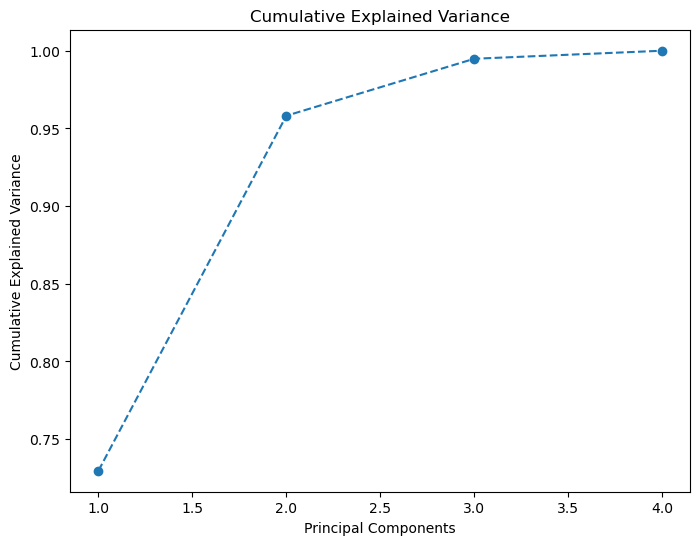

In [22]:
# Step 7: Cumulative Explained Variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

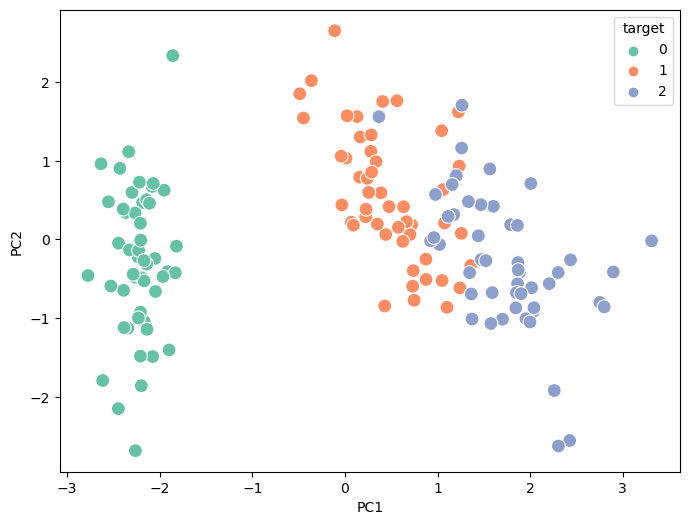

In [23]:
# Step 8: Biplot (Showing the PCA Components)
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='target', palette='Set2', data=pca_df, s=100)

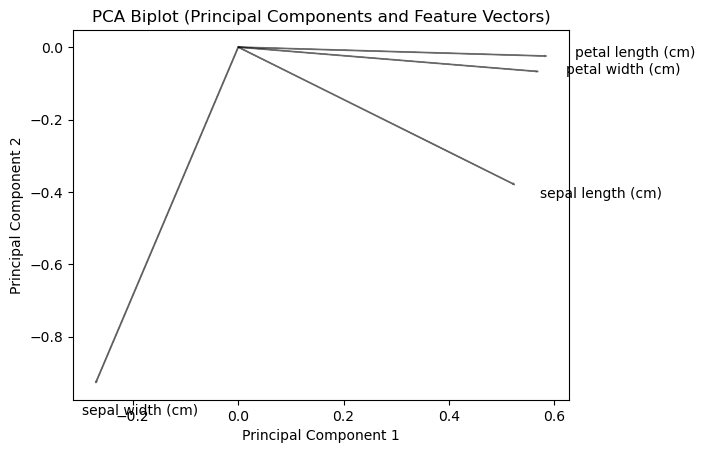

In [25]:
for i in range(len(sorted_eigenvectors)):
    plt.arrow(0, 0, sorted_eigenvectors[i, 0], sorted_eigenvectors[i, 1], color='black', alpha=0.5)
    plt.text(sorted_eigenvectors[i, 0] * 1.1, sorted_eigenvectors[i, 1] * 1.1, features.columns[i], color='black')
plt.title('PCA Biplot (Principal Components and Feature Vectors)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [26]:
# Step 9: Final Dataset with PCA Components (Reduced Dimensions)
# We can select the top 2 or more components depending on the cumulative explained variance
final_df = pca_df[['PC1', 'PC2']]
final_df['target'] = df['target']

# You can save the final PCA-transformed dataset as CSV if needed
# final_df.to_csv('pca_transformed_data.csv', index=False)
print("\nFinal DataFrame with PCA Components:\n", final_df.head())


Final DataFrame with PCA Components:
         PC1       PC2  target
0 -2.264703 -0.480027       0
1 -2.080961  0.674134       0
2 -2.364229  0.341908       0
3 -2.299384  0.597395       0
4 -2.389842 -0.646835       0
